TypeError: get_h_uu_p_uu_s_uu() got an unexpected keyword argument 'p_consistent'

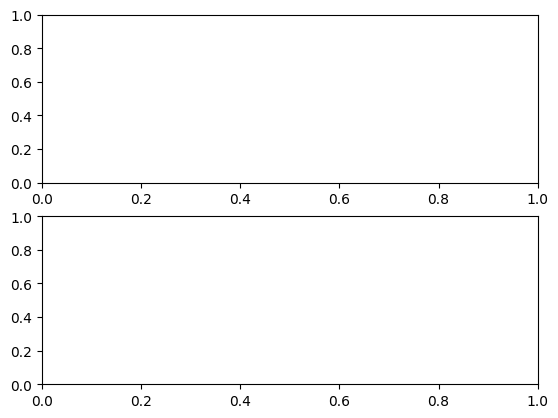

In [2]:
from crawfish.utils.testing import EXAMPLE_CALC_DIRS_DIR
from crawfish.core.elecdata import ElecData
import matplotlib.pyplot as plt
from crawfish.funcs.pcohp import get_pcohp

n2_calcdir = EXAMPLE_CALC_DIRS_DIR / "N2_bare_min"
assert n2_calcdir.exists()

# edata = ElecData(n2_calcdir)
# erange, pdos = get_pdos(edata, elements="N", lti=False, res=0.001, norm_max=True)
# plt.plot(erange, pdos)
# erange, pdos = get_pdos(edata, erange=erange, elements="N", lti=True, rattle_eigenvals=True, norm_max=True)
# plt.plot(erange, pdos)
# plt.ylim(0,0.01)
# plt.xlim(0,0.1)


fig, ax = plt.subplots(nrows=2)

#edata = ElecData(n2_calcdir)
edata = ElecData.from_calc_dir(calc_dir=n2_calcdir)
erange, pdos = get_pcohp(edata, idcs1=0, idcs2=1, lti=False, res=0.001, norm_max=True)
ax[0].plot(erange, pdos)
erange, pdos = get_pcohp(edata, idcs1=0, idcs2=1, erange=erange, lti=True, rattle_eigenvals=True, norm_max=True)
ax[1].plot(erange, pdos)

/Users/richb/vs/crawfish/src/crawfish/core/operations/matrix.py:158: ComplexWarning: Casting complex values to real discards the imaginary part
  s_tj_uu = np.array(s_tj_uu, dtype=REAL_DTYPE)


gf


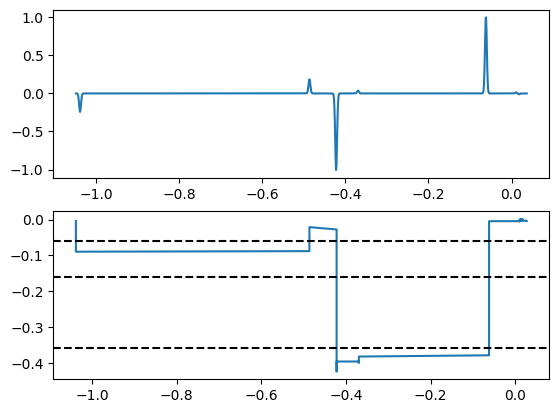

gd
gfg


In [ ]:
from crawfish.utils.testing import EXAMPLE_CALC_DIRS_DIR
from crawfish.funcs.pcohp import get_pcohp
from crawfish.core.operations.vector import get_uneven_integrated_array
from crawfish.core.operations.matrix import _get_gen_tj, get_h_uu_p_uu_s_uu, get_s_tj_uu
from crawfish.core.elecdata import ElecData
import matplotlib.pyplot as plt
# from pymatgen.core.units import Ha_to_eV, kCal_to_kJ,

n2_calcdir = EXAMPLE_CALC_DIRS_DIR / "N2_no_fillings"
assert n2_calcdir.exists()

# edata = ElecData(n2_calcdir)
# erange, pdos = get_pdos(edata, elements="N", lti=False, res=0.001, norm_max=True)
# plt.plot(erange, pdos)
# erange, pdos = get_pdos(edata, erange=erange, elements="N", lti=True, rattle_eigenvals=True, norm_max=True)
# plt.plot(erange, pdos)
# plt.ylim(0,0.01)
# plt.xlim(0,0.1)


fig, ax = plt.subplots(nrows=2)

edata = ElecData.from_calc_dir(n2_calcdir)
erange, pdos = get_pcohp(edata, idcs1=0, idcs2=1, lti=False, res=0.001, norm_max=True)
ax[0].plot(erange, pdos)

s_tj_uu = get_s_tj_uu(edata.proj_tju, pos=True)

kj_p_mol_to_ha = 2625.5
NN_single = 160 / kj_p_mol_to_ha
NN_double = 418 / kj_p_mol_to_ha
NN_triple = 941 / kj_p_mol_to_ha

h_uu, p_uu, s_uu = get_h_uu_p_uu_s_uu(edata.proj_tju, edata.e_tj, edata.occ_tj, edata.wk_t)
pcohp_tj = _get_gen_tj(edata.proj_tju, h_uu, edata.wk_t, [0, 1, 2, 3], [4, 5, 6, 7])
pcohp_sabcj = pcohp_tj.reshape([edata.nspin] + list(edata.kfolding) + [edata.nbands])
e_sabcj = edata.e_sabcj
es, integs = get_uneven_integrated_array(e_sabcj, pcohp_sabcj)
ax[1].plot(es, integs)
for v in [NN_single, NN_double, NN_triple]:
    ax[1].axhline(-v, color="black", linestyle="--")

print("gf")
plt.show()
print("gd")
print("gfg")

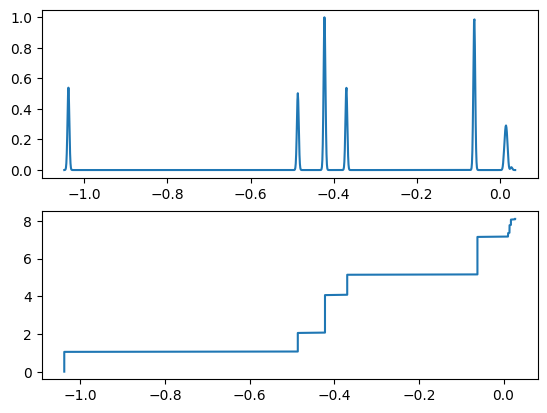

In [ ]:
from crawfish.funcs.pdos import get_pdos, get_ipdos

fig, ax = plt.subplots(nrows=2)
erange, pdos = get_pdos(edata, idcs=0, lti=False, res=0.001, norm_max=True)
ax[0].plot(erange, pdos)
es, cs = get_ipdos(edata, idcs=0)
ax[1].plot(es, cs)

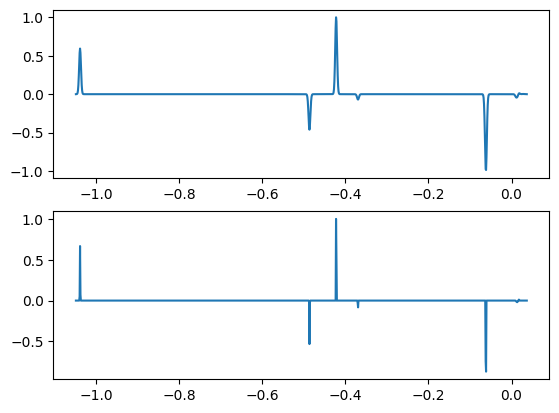

In [ ]:
from crawfish.funcs.pcoop import get_pcoop

fig, ax = plt.subplots(nrows=2)

edata = ElecData(n2_calcdir)
erange, pdos = get_pcoop(edata, idcs1=0, idcs2=1, lti=False, res=0.001, norm_max=True)
ax[0].plot(erange, pdos)
erange, pdos = get_pcoop(edata, idcs1=0, idcs2=1, erange=erange, lti=True, rattle_eigenvals=True, norm_max=True)
ax[1].plot(erange, pdos)

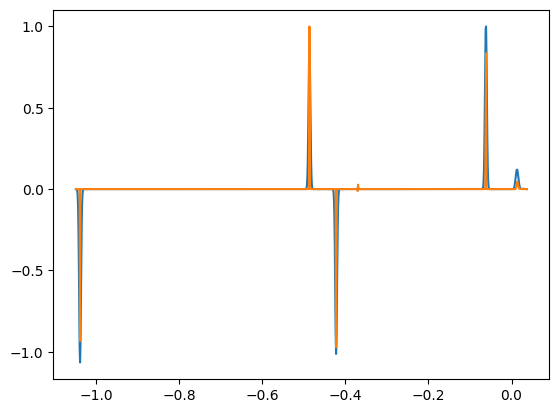

In [ ]:
from crawfish.funcs.pcohp import get_pcohp

edata = ElecData(n2_calcdir)
erange, pdos = get_pcohp(edata, idcs1=0, idcs2=1, lti=False, res=0.001, norm_max=True)
plt.plot(erange, pdos)
erange, pdos = get_pcohp(edata, idcs1=0, idcs2=1, erange=erange, lti=True, rattle_eigenvals=True, norm_max=True)
plt.plot(erange, pdos)